In [1]:
import time
import pandas as pd
import numpy as np

In [2]:
import os
from google.colab import drive
drive.mount("/content/drive/")
os.chdir("drive/My Drive/Colab Notebooks/CSE 512 Project/Tally")

Mounted at /content/drive/


In [32]:
SVM_RBF = pd.read_csv("SVMRbfNumericalResults.csv").iloc[: , 1:]
SVM_Sig = pd.read_csv("SVMSigmoidNumericalResults.csv").iloc[: , 1:]
SVM_Poly = pd.read_csv("SVMPolyNumericalResults.csv").iloc[: , 1:]
Rand_For = pd.read_csv("RandomForestNumericalResults.csv").iloc[: , 1:]
ANN = pd.read_csv("AnnNumericalResults.csv").iloc[: , 1:]

In [33]:
df = SVM_RBF.drop(columns = ['gender_predicted'])
df2 = df

In [34]:
SVM_RBF = SVM_RBF['gender_predicted'].to_numpy()
SVM_Sig = SVM_Sig['gender_predicted'].to_numpy()
SVM_Poly = SVM_Poly['gender_predicted'].to_numpy()
Rand_For = Rand_For['gender_predicted'].to_numpy()
ANN = ANN['gender_predicted'].to_numpy()

In [35]:
SVM_RBF[0:5]

array([ 4.86067505,  1.06167354, -2.5101955 , -2.69659911, -1.97635782])

In [36]:
SVM_RBF_res = []
for i in SVM_RBF:
    if i >= 0:
        SVM_RBF_res.append(1)
    else:
        SVM_RBF_res.append(0)
        

SVM_Sig_res = []
for i in SVM_Sig:
    if i >= 0:
        SVM_Sig_res.append(1)
    else:
        SVM_Sig_res.append(0)
        
SVM_Poly_res = []
for i in SVM_Poly:
    if i >= 0:
        SVM_Poly_res.append(1)
    else:
        SVM_Poly_res.append(0)
        
RF_res = []
for i in Rand_For:
    if i >= 0.5:
        RF_res.append(1)
    else:
        RF_res.append(0)
        
ANN_res = []
for i in ANN:
    if i >= 0.5:
        ANN_res.append(1)
    else:
        ANN_res.append(0)

In [37]:
df['SVM_RBF'] = SVM_RBF_res
df['SVM_Poly'] = SVM_Poly_res
df['SVM_Sigmoid'] = SVM_Sig_res
df['RF'] = RF_res
df['ANN'] = ANN_res

In [38]:
misclass = []

for i in range(len(df['gender'])):
    gender = df.gender[i]
    rbf = df.SVM_RBF[i]
    poly = df.SVM_Poly[i]
    sig = df.SVM_Sigmoid[i]
    rf = df.RF[i]
    ann = df.ANN[i]
    if gender == 1:
        if (rbf + poly + sig + rf + ann) == 0:
            misclass.append(1)
        else: 
            misclass.append(0)
            
    if gender == 0:
        if (rbf + poly + sig + rf + ann) == 5:
            misclass.append(1)
        else: 
            misclass.append(0)

In [41]:
df = df2
df['misclass'] = misclass

In [43]:
df = df.drop(columns = ['SVM_RBF', 'SVM_Poly', 'SVM_Sigmoid', 'RF', 'ANN'])

In [45]:
import seaborn as sn
import matplotlib.pyplot as plt

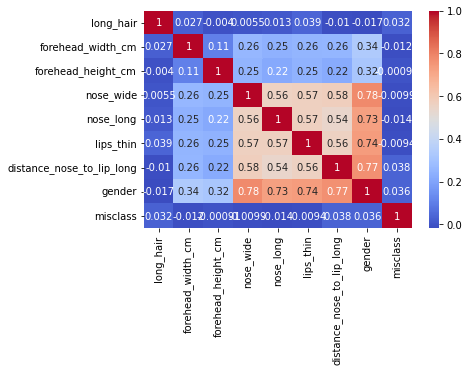

In [47]:
corr_matrix = df.corr()
sn.heatmap(corr_matrix, annot=True, cmap= 'coolwarm')
plt.show()

In [48]:
corr_matrix

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender,misclass
long_hair,1.000000,0.027146,-0.003975,0.005489,0.012526,0.039240,-0.010239,-0.016912,0.031989
forehead_width_cm,0.027146,1.000000,0.107333,0.262974,0.245004,0.256837,0.258208,0.337856,-0.011680
forehead_height_cm,-0.003975,0.107333,1.000000,0.250805,0.221326,0.247809,0.223485,0.317619,-0.000911
nose_wide,0.005489,0.262974,0.250805,1.000000,0.559414,0.570107,0.578232,0.784345,-0.009896
nose_long,0.012526,0.245004,0.221326,0.559414,1.000000,0.569656,0.541200,0.726634,-0.014089
lips_thin,0.039240,0.256837,0.247809,0.570107,0.569656,1.000000,0.564220,0.738470,-0.009394
distance_nose_to_lip_long,-0.010239,0.258208,0.223485,0.578232,0.541200,0.564220,1.000000,0.766287,0.037565
gender,-0.016912,0.337856,0.317619,0.784345,0.726634,0.738470,0.766287,1.000000,0.036385
misclass,0.031989,-0.011680,-0.000911,-0.009896,-0.014089,-0.009394,0.037565,0.036385,1.000000


In [49]:
wrong = df[df.misclass == 1]

In [50]:
wrong

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender,misclass
309,1,0.658537,0.55,0,0,0,1,1,1
333,1,0.365854,0.15,0,1,0,1,1,1
366,1,0.341463,0.45,0,0,1,1,1,1
591,1,0.073171,0.60,1,0,0,0,1,1
652,1,0.243902,0.60,0,1,1,1,0,1
838,1,0.365854,0.25,1,1,0,0,1,1
924,1,0.707317,0.40,1,0,1,1,0,1


In [85]:
wrong.to_csv('NumericalMisclass.csv', index = False)

In [52]:
male = df[df.gender == 1]
female = df[df.gender == 0]

In [53]:
male.corr()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender,misclass
long_hair,1.000000,0.027433,0.001027,0.039963,0.034604,0.108750,-0.021828,NaN,0.039363
forehead_width_cm,0.027433,1.000000,-0.021134,-0.004839,0.027843,0.018424,-0.021129,NaN,-0.056381
forehead_height_cm,0.001027,-0.021134,1.000000,-0.001436,-0.059114,-0.036629,-0.075223,NaN,-0.040741
nose_wide,0.039963,-0.004839,-0.001436,1.000000,0.033604,-0.027035,-0.119423,NaN,-0.150056
nose_long,0.034604,0.027843,-0.059114,0.033604,1.000000,0.125061,-0.011027,NaN,-0.146679
lips_thin,0.108750,0.018424,-0.036629,-0.027035,0.125061,1.000000,0.017920,NaN,-0.187690
distance_nose_to_lip_long,-0.021828,-0.021129,-0.075223,-0.119423,-0.011027,0.017920,1.000000,NaN,-0.084038
gender,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
misclass,0.039363,-0.056381,-0.040741,-0.150056,-0.146679,-0.187690,-0.084038,NaN,1.000000


In [54]:
female.corr()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender,misclass
long_hair,1.000000,0.046135,0.002126,0.019354,0.037695,0.040788,0.032590,NaN,0.023472
forehead_width_cm,0.046135,1.000000,0.038726,-0.001492,-0.036079,0.001632,0.027342,NaN,0.040248
forehead_height_cm,0.002126,0.038726,1.000000,0.009192,0.039696,0.105290,0.027247,NaN,0.045472
nose_wide,0.019354,-0.001492,0.009192,1.000000,-0.082438,-0.015576,0.013796,NaN,0.085782
nose_long,0.037695,-0.036079,0.039696,-0.082438,1.000000,0.018726,-0.058881,NaN,0.061553
lips_thin,0.040788,0.001632,0.105290,-0.015576,0.018726,1.000000,-0.028733,NaN,0.173325
distance_nose_to_lip_long,0.032590,0.027342,0.027247,0.013796,-0.058881,-0.028733,1.000000,NaN,0.180324
gender,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
misclass,0.023472,0.040248,0.045472,0.085782,0.061553,0.173325,0.180324,NaN,1.000000


In [55]:
from scipy.stats.stats import pearsonr

In [58]:
pearsonr(female.lips_thin, female.misclass)

(0.17332516173905763, 9.336498622396486e-05)

In [60]:
female_test = female[female.nose_wide + female.nose_long + female.lips_thin + female.distance_nose_to_lip_long >= 3]

In [61]:
female_test

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender,misclass
652,1,0.243902,0.6,0,1,1,1,0,1
924,1,0.707317,0.4,1,0,1,1,0,1


In [70]:
male_test = male[male.nose_wide + male.nose_long + male.lips_thin <= 1]

In [73]:
wrong[wrong.gender == 1]

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender,misclass
309,1,0.658537,0.55,0,0,0,1,1,1
333,1,0.365854,0.15,0,1,0,1,1,1
366,1,0.341463,0.45,0,0,1,1,1,1
591,1,0.073171,0.60,1,0,0,0,1,1
838,1,0.365854,0.25,1,1,0,0,1,1


In [108]:
male_test = male[male.nose_wide + male.nose_long + male.lips_thin + male.distance_nose_to_lip_long <= 2]

In [109]:
male_test = male_test[male_test.forehead_height_cm * male_test.forehead_width_cm <= .4]
male_test = male_test[male_test.forehead_height_cm <= .6]
male_test = male_test[male_test.forehead_width_cm <= .66]

In [110]:
male_test['sum'] = male_test.nose_wide + male_test.nose_long + male_test.lips_thin + male_test.distance_nose_to_lip_long

In [111]:
male_test.sort_values(by = ['misclass'], ascending=False)

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender,misclass,sum
309,1,0.658537,0.55,0,0,0,1,1,1,1
333,1,0.365854,0.15,0,1,0,1,1,1,2
366,1,0.341463,0.45,0,0,1,1,1,1,2
591,1,0.073171,0.60,1,0,0,0,1,1,1
838,1,0.365854,0.25,1,1,0,0,1,1,2
250,1,0.658537,0.60,1,0,1,0,1,0,2
311,1,0.512195,0.55,1,0,0,1,1,0,2
324,1,0.390244,0.40,1,0,0,1,1,0,2
360,1,0.585366,0.35,1,1,0,0,1,0,2
517,0,0.585366,0.30,1,1,0,0,1,0,2


In [128]:
male_test2 = male_test[male_test.forehead_width_cm > 0.34]
male_test2 = male_test2[male_test2.forehead_width_cm < 0.37]

In [129]:
male_test2.sort_values(by = ['misclass'], ascending=False)

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender,misclass,sum
333,1,0.365854,0.15,0,1,0,1,1,1,2
366,1,0.341463,0.45,0,0,1,1,1,1,2
838,1,0.365854,0.25,1,1,0,0,1,1,2
